In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

Please upload the `1730285881-Airbnb_Open_Data.xlsx` file to your Colab session's root directory. Then, you can run the code to load the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df.drop_duplicates(inplace=True)
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

In [ ]:
df.rename(columns={'price': 'price$', 'service fee': 'service fee$'}, inplace=True)
display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df=df.drop(df[df['availability 365']>500].index)
df.duplicated().value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102057 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102057 non-null  int64         
 1   NAME                            101787 non-null  object        
 2   host id                         102057 non-null  int64         
 3   host_identity_verified          101768 non-null  object        
 4   host name                       101651 non-null  object        
 5   neighbourhood group             102028 non-null  object        
 6   neighbourhood                   102041 non-null  object        
 7   lat                             102049 non-null  float64       
 8   long                            102049 non-null  float64       
 9   country                         101525 non-null  object        
 10  country code                    101926 non-null  object      

In [ ]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price$,service fee$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101953.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86226,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,0.497945,2012.488090,625.355580,125.039249,8.126640,27.517948,2019-06-11 02:12:22.996312064,1.375408,3.278733,7.936937,141.043992
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,0.000000,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.627173e+07,2.853742e+10,0.055852,0.049502,0.499998,5.765838,331.672649,66.325905,30.616698,49.571744,NaN,1.748019,1.285089,32.266355,135.429156


In [ ]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53429
Private room,46306
Shared room,2208
Hotel room,115


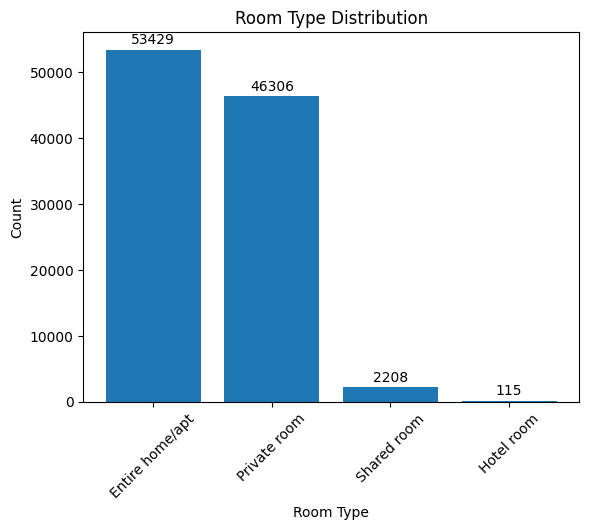

In [ ]:
room_type_bar =plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=2);
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949
manhatan,1


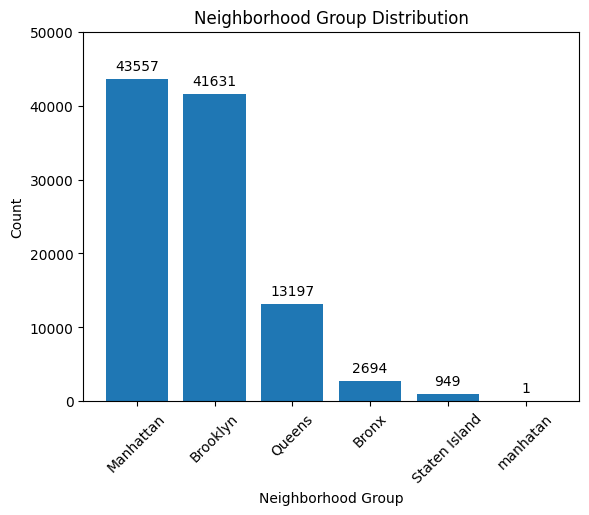

In [ ]:
hood_group_bars = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bars,labels=hood_group.loc[:, "count"],padding=4);
plt.ylim(0,50000)
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.title('Neighborhood Group Distribution')
plt.xticks(rotation=45)
plt.show()

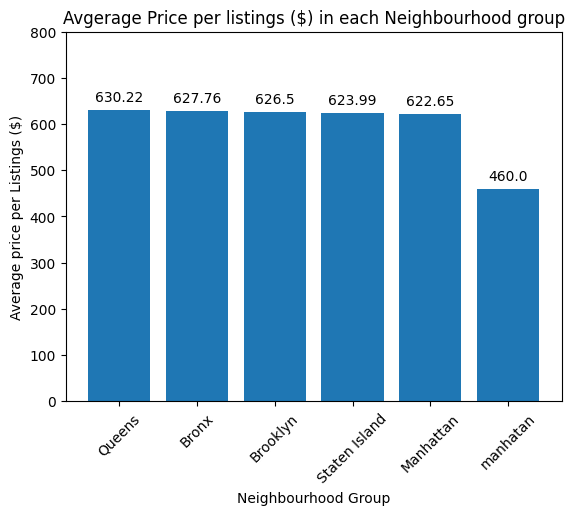

In [33]:
avg_price=df.groupby('neighbourhood group')['price$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price$']);
plt.bar_label(avg_price_bar,labels=round(avg_price['price$'],2),label_type='edge',padding=4);
plt.ylim(0,800)
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average price per Listings ($)');
plt.xticks(rotation =45);
plt.title('Avgerage Price per listings ($) in each Neighbourhood group');

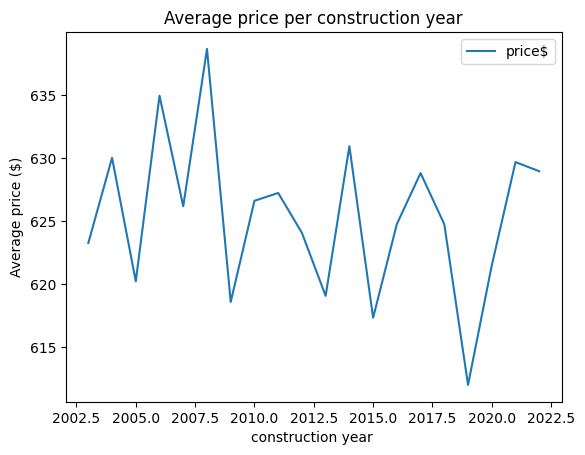

In [34]:
df.groupby(df['Construction year'])['price$'].mean().to_frame().plot();
plt.xlabel('construction year ');
plt.ylabel('Average price ($)');
plt.title('Average price per construction year');

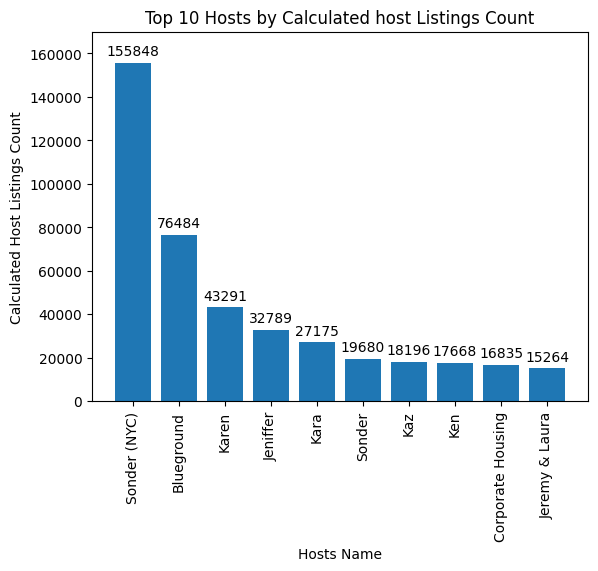

In [40]:
hosts =df.groupby('host name') ['calculated host listings count'].sum().sort_values (ascending= False).nlargest (10).to_frame()
hosts_bar =plt.bar(hosts. index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=90);
plt.ylim([0, 170000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');